In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [4]:
df.sample(10).style.background_gradient(cmap='rainbow')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [6]:
df.describe(include='all').style.background_gradient(cmap='coolwarm')

In [7]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.Region.value_counts()

Region
Andhra Pradesh      10
Assam               10
Uttarakhand         10
Uttar Pradesh       10
Tripura             10
Telangana           10
Tamil Nadu          10
Rajasthan           10
Punjab              10
Puducherry          10
Odisha              10
Meghalaya           10
Maharashtra         10
Madhya Pradesh      10
Kerala              10
Karnataka           10
Jharkhand           10
Himachal Pradesh    10
Haryana             10
Gujarat             10
Goa                 10
Delhi               10
Chhattisgarh        10
Bihar               10
West Bengal         10
Jammu & Kashmir      9
Sikkim               8
Name: count, dtype: int64

In [10]:
df = df.rename(columns={df.columns[0]:'State',df.columns[1]:'date',df.columns[3]:'EUR',df.columns[4]:'EE', df.columns[5]:'ELPR', df.columns[6]:'Region'})
df.head()

State         date  Frequency    EUR        EE   ELPR Region  \
0  Andhra Pradesh   31-01-2020          M   5.48  16635535  41.02  South   
1  Andhra Pradesh   29-02-2020          M   5.83  16545652  40.90  South   
2  Andhra Pradesh   31-03-2020          M   5.79  15881197  39.18  South   
3  Andhra Pradesh   30-04-2020          M  20.51  11336911  33.10  South   
4  Andhra Pradesh   31-05-2020          M  17.43  12988845  36.46  South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [11]:
df['date']=pd.to_datetime(df['date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       267 non-null    object        
 1   date        267 non-null    datetime64[ns]
 2    Frequency  267 non-null    object        
 3   EUR         267 non-null    float64       
 4   EE          267 non-null    int64         
 5   ELPR        267 non-null    float64       
 6   Region      267 non-null    object        
 7   longitude   267 non-null    float64       
 8   latitude    267 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 18.9+ KB


In [12]:
group_region = df.groupby(['Region'])[['EUR', 'EE', 'ELPR']].mean().reset_index()
group_region = round(group_region,2)
group_region


Region    EUR           EE   ELPR
0       East  13.92  19602366.90  40.11
1      North  15.89  13072487.92  38.70
2  Northeast  10.95   3617105.53  52.06
3      South  10.45  14040589.33  40.44
4       West   8.24  18623512.72  41.26

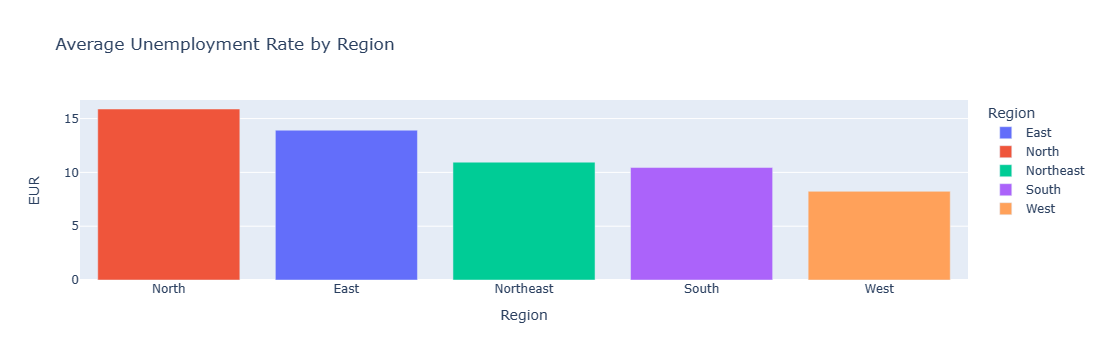

In [13]:
fig = px.bar(group_region, x="Region", y="EUR", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [14]:
group_state = df.groupby(['State'])[['EUR', 'EE', 'ELPR']].mean().reset_index()

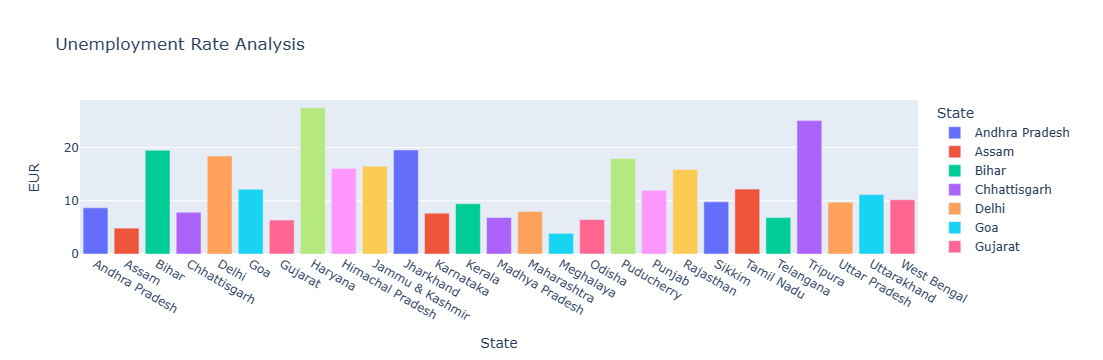

In [15]:
fig = px.bar(group_state, x="State", y="EUR", color="State", title="Unemployment Rate Analysis")
fig.show()

In [16]:
df1=pd.read_csv("Unemployment in India.csv")

<Axes: xlabel='Area', ylabel='count'>

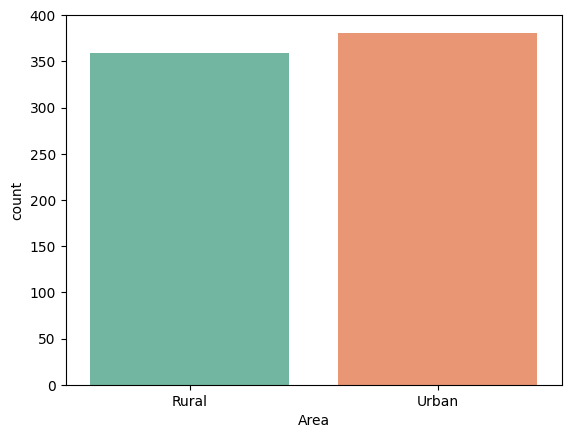

In [17]:
sns.countplot(x='Area',data=df1,palette='Set2')

In [18]:
df['month_int']=df['date'].dt.month
df['month']=df['month_int'].apply(lambda x: calendar.month_abbr[x])
df

State       date  Frequency    EUR        EE   ELPR Region  \
0    Andhra Pradesh 2020-01-31          M   5.48  16635535  41.02  South   
1    Andhra Pradesh 2020-02-29          M   5.83  16545652  40.90  South   
2    Andhra Pradesh 2020-03-31          M   5.79  15881197  39.18  South   
3    Andhra Pradesh 2020-04-30          M  20.51  11336911  33.10  South   
4    Andhra Pradesh 2020-05-31          M  17.43  12988845  36.46  South   
..              ...        ...        ...    ...       ...    ...    ...   
262     West Bengal 2020-06-30          M   7.29  30726310  40.39   East   
263     West Bengal 2020-07-31          M   6.83  35372506  46.17   East   
264     West Bengal 2020-08-31          M  14.87  33298644  47.48   East   
265     West Bengal 2020-09-30          M   9.35  35707239  47.73   East   
266     West Bengal 2020-10-31          M   9.98  33962549  45.63   East   

     longitude  latitude  month_int month  
0      15.9129    79.740          1   Jan  
1      15.9129    79.740          2   Feb  
2      15.9129    79.740          3   Mar  
3      15.9129    79.740          4   Apr  
4      15.9129    79.740          5   May  
..         ...       ...        ...   ...  
262    22.9868    87.855          6   Jun  
263    22.9868    87.855          7   Jul  
264    22.9868    87.855          8   Aug  
265    22.9868    87.855          9   Sep  
266    22.9868    87.855         10   Oct  

[267 rows x 11 columns]

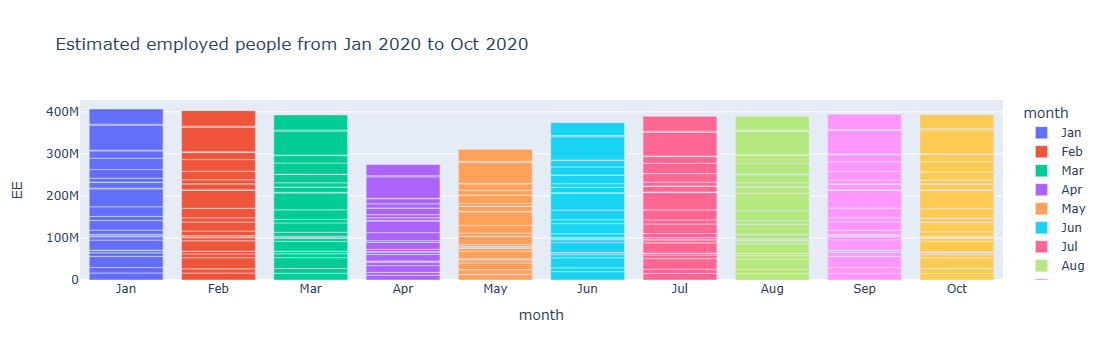

In [19]:
fig=px.bar(df,x='month',y='EE',color='month',category_orders={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

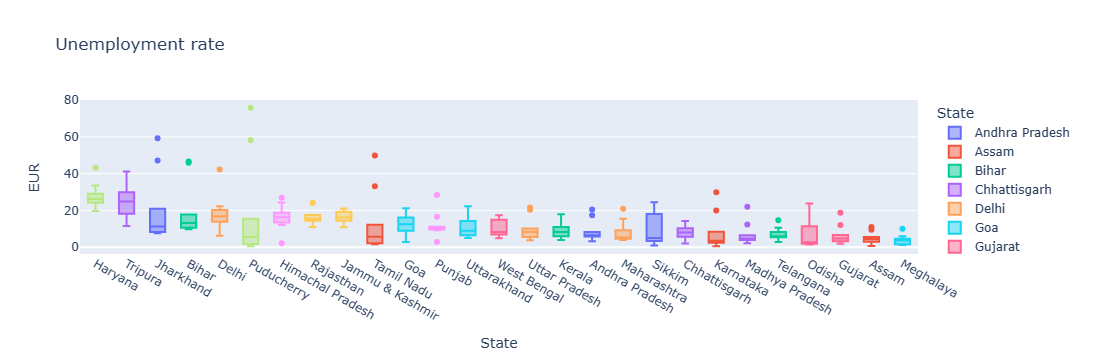

In [20]:
fig=px.box(data_frame=df,x='State',y='EUR',color='State',title='Unemployment rate')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

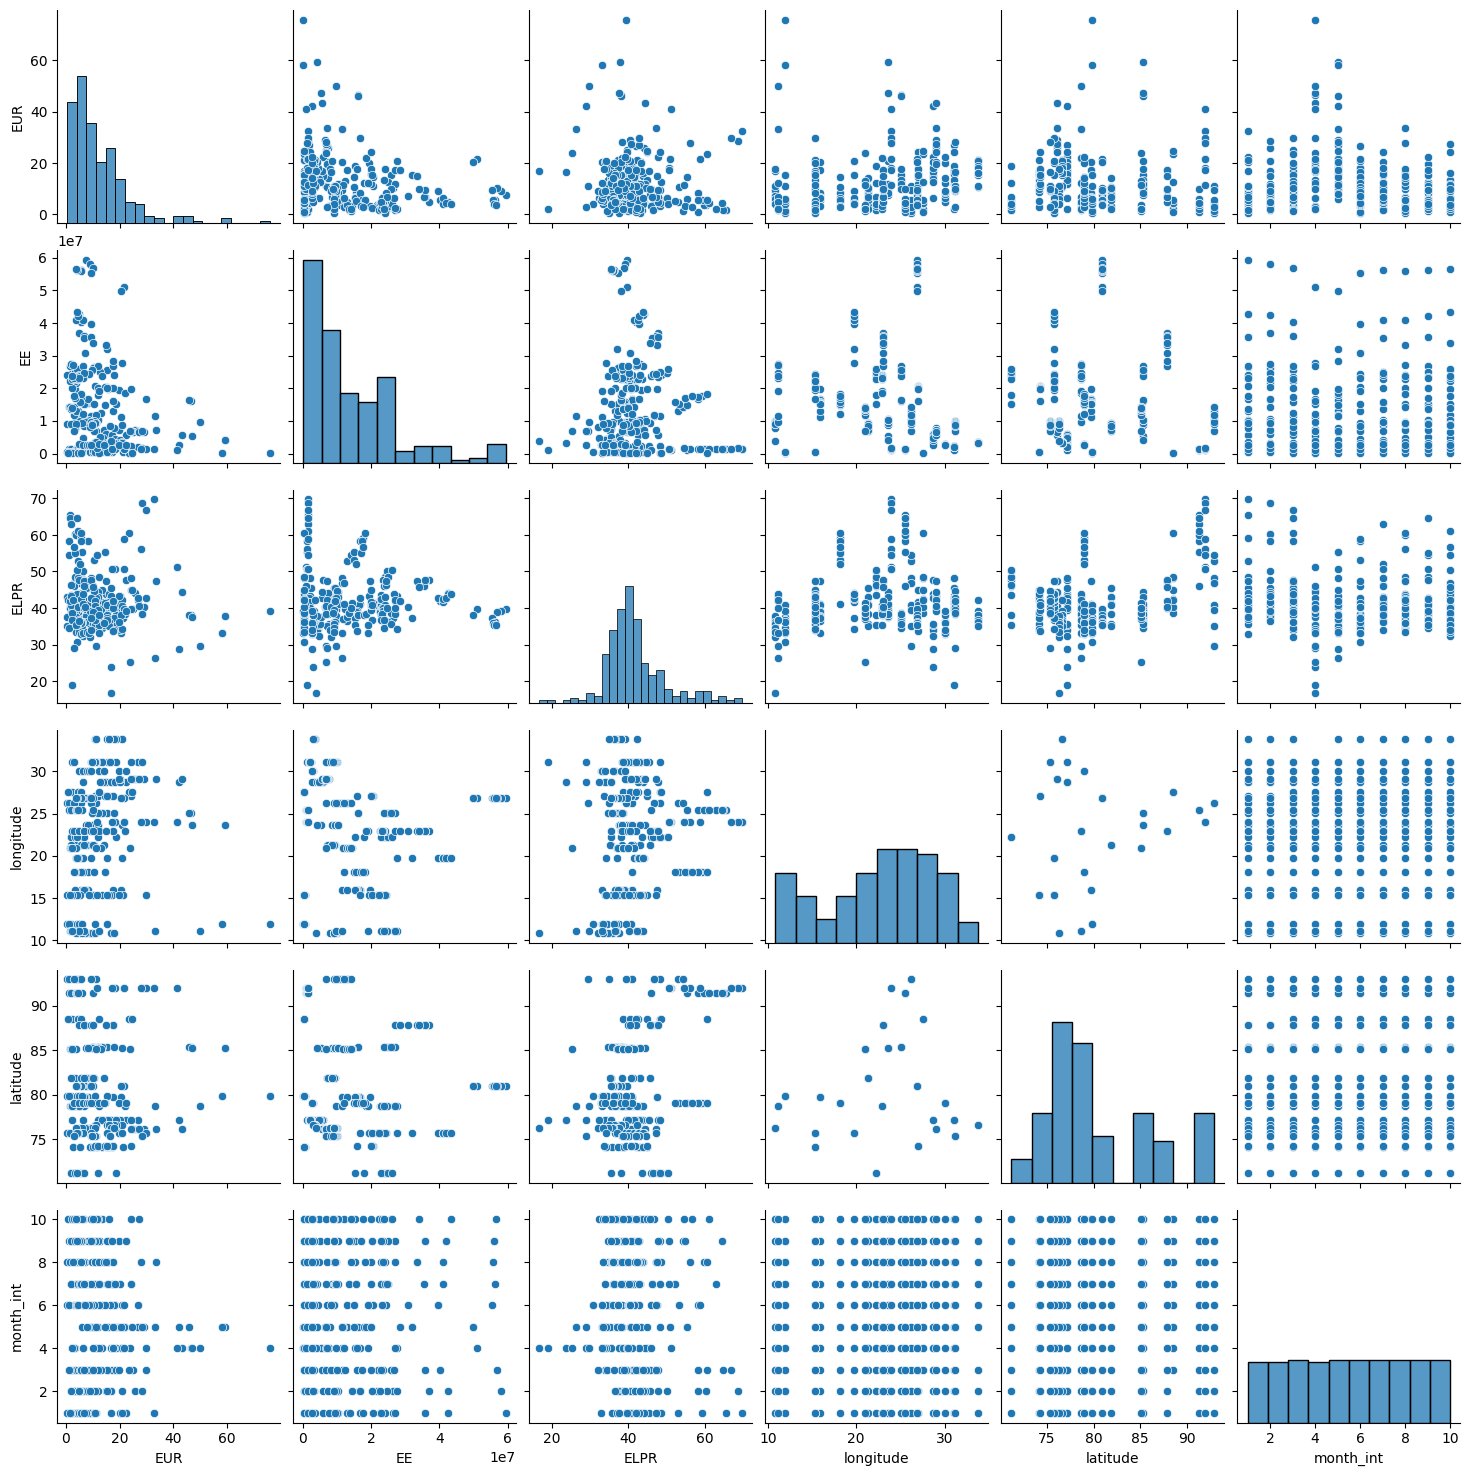

In [21]:
sns.pairplot(df,palette='Set2')

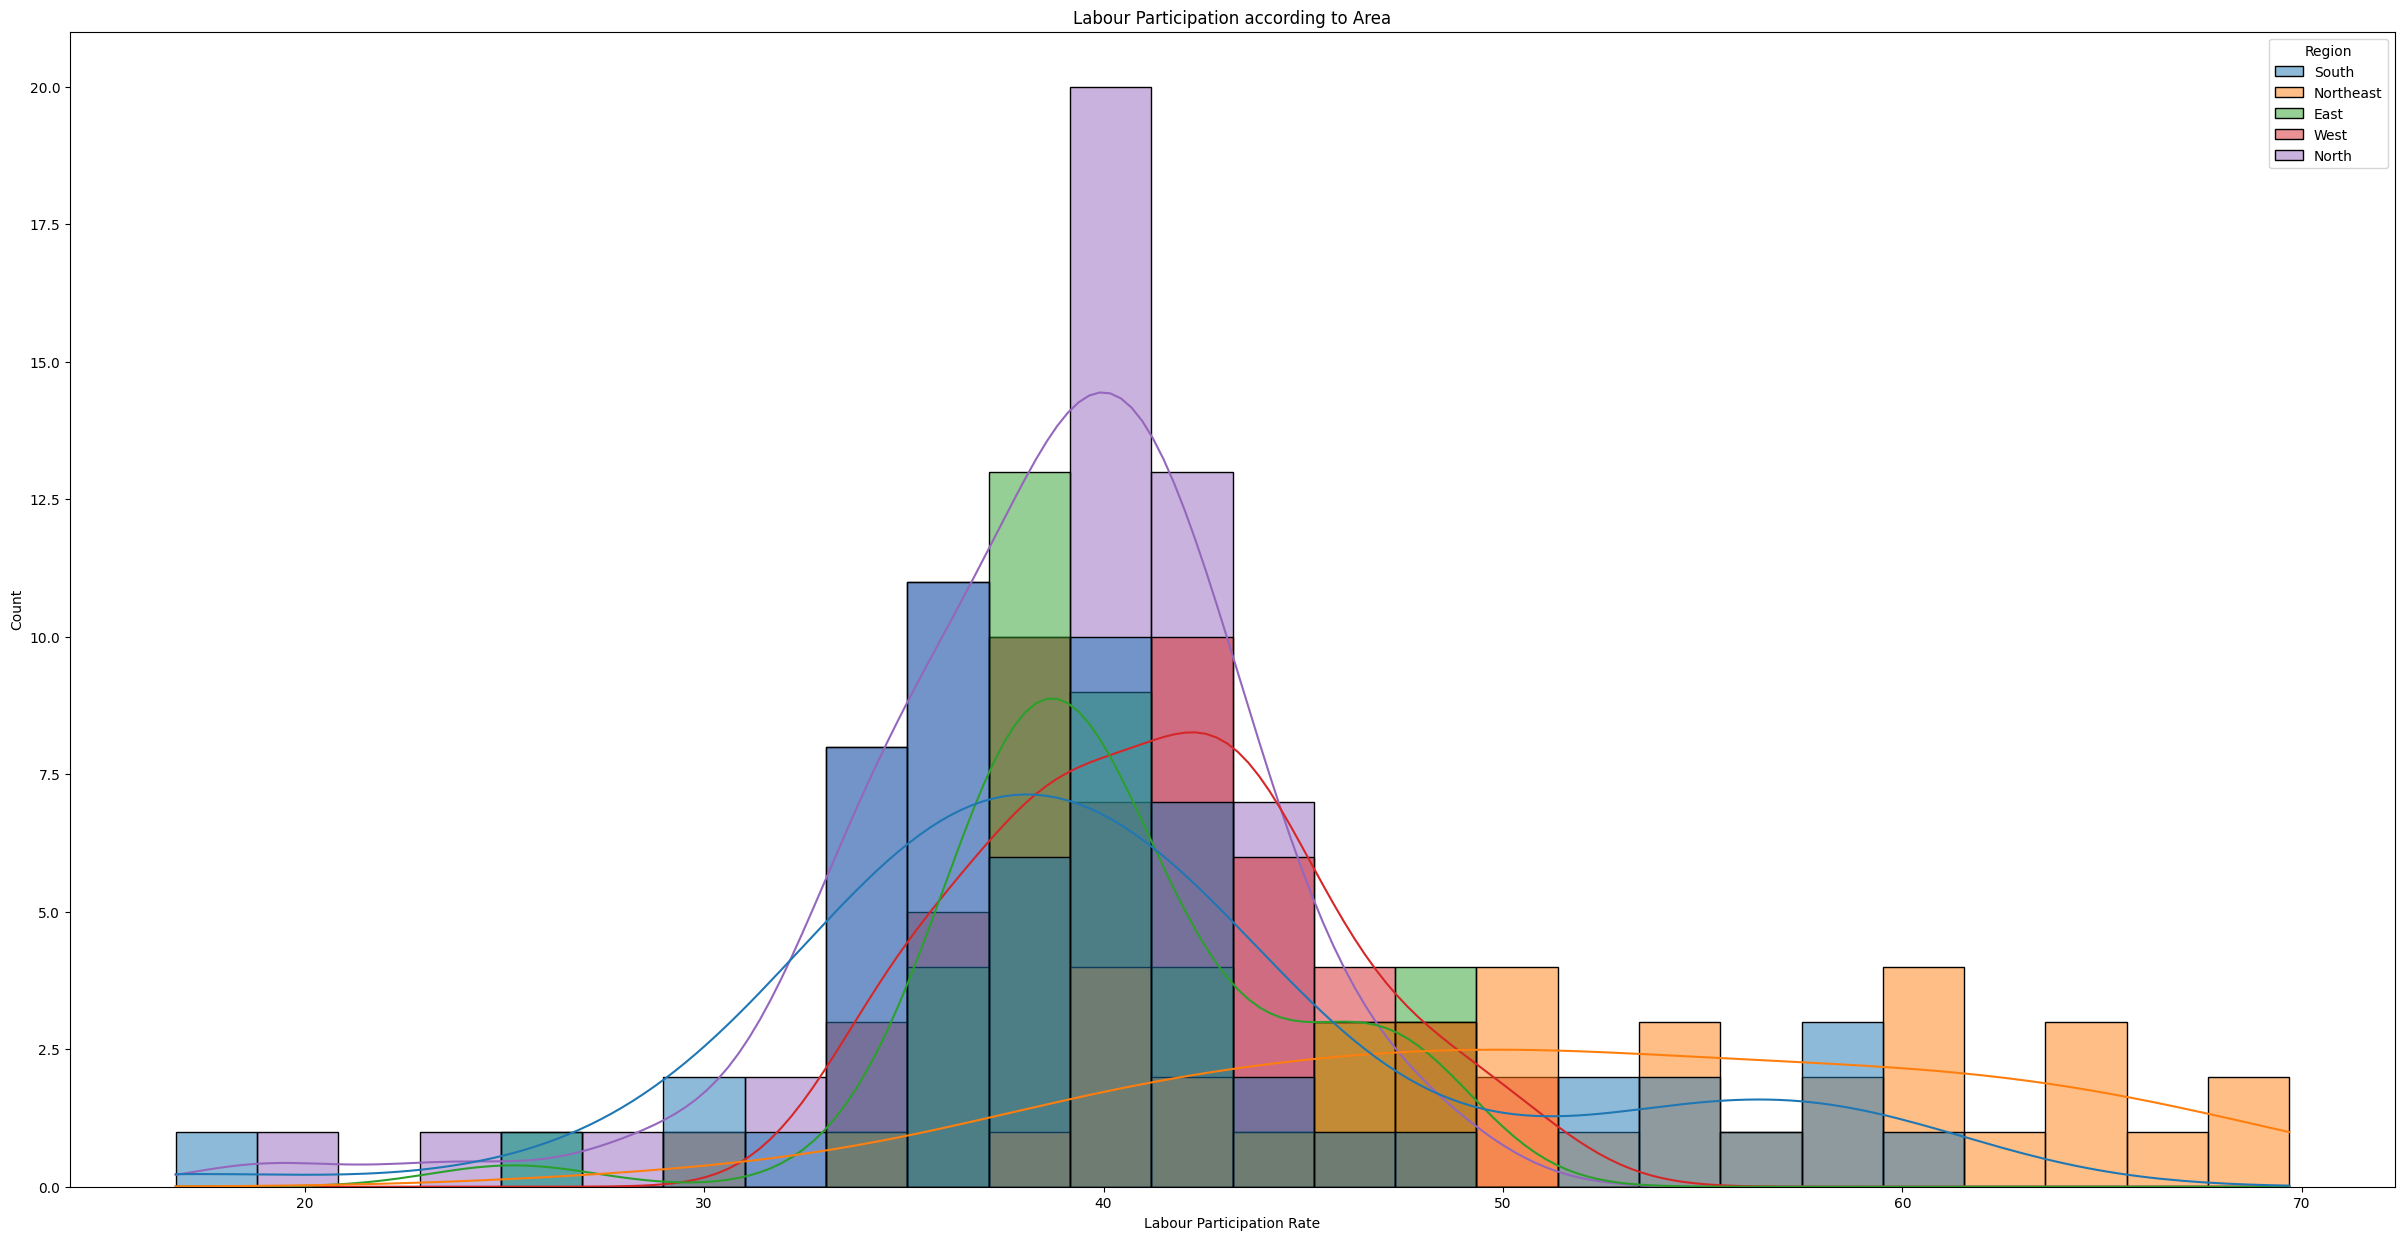

In [22]:
fig = plt.figure(figsize = (30, 15))
sns.histplot(x='ELPR', data=df, kde=True, hue='Region')
plt.title('Labour Participation according to Area')
plt.xlabel('Labour Participation Rate')
plt.show()

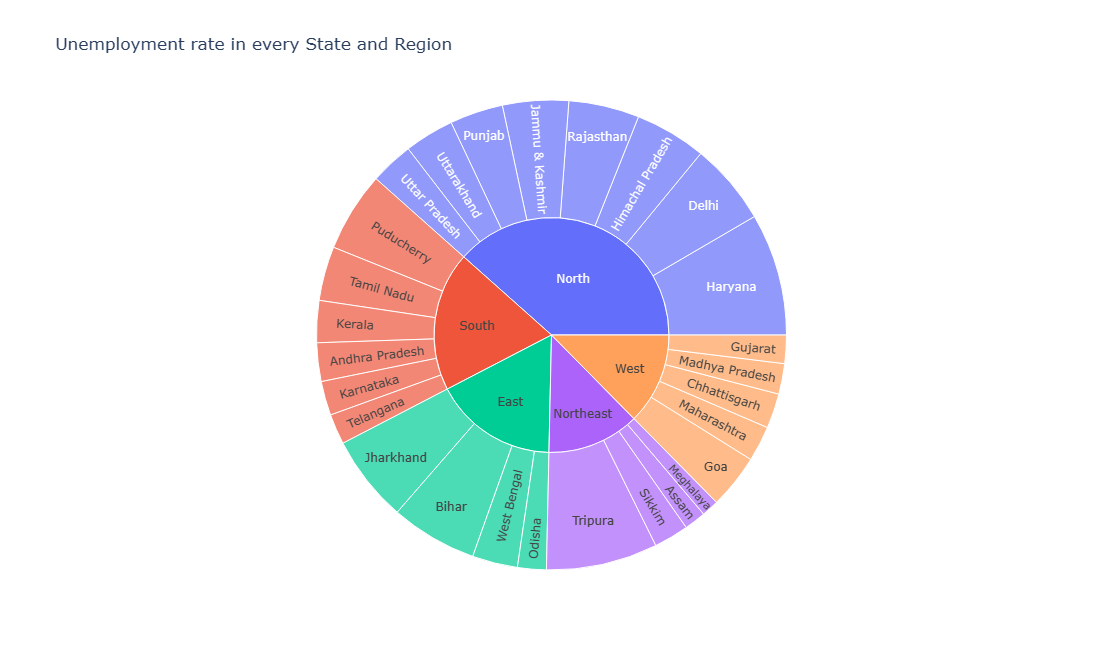

In [23]:
unemployment = df[["State", "Region", "EUR"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='EUR',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()

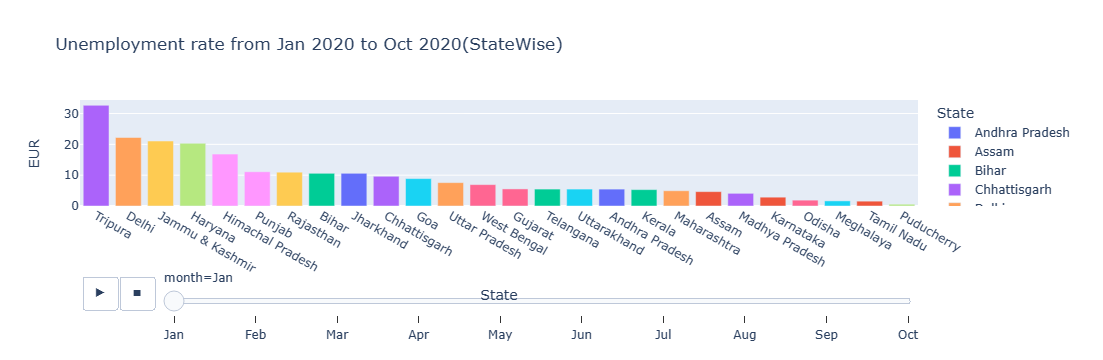

In [24]:
fig = px.bar(df,x='State',y='EUR',animation_frame='month',color='State',
            title='Unemployment rate from Jan 2020 to Oct 2020(StateWise)')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

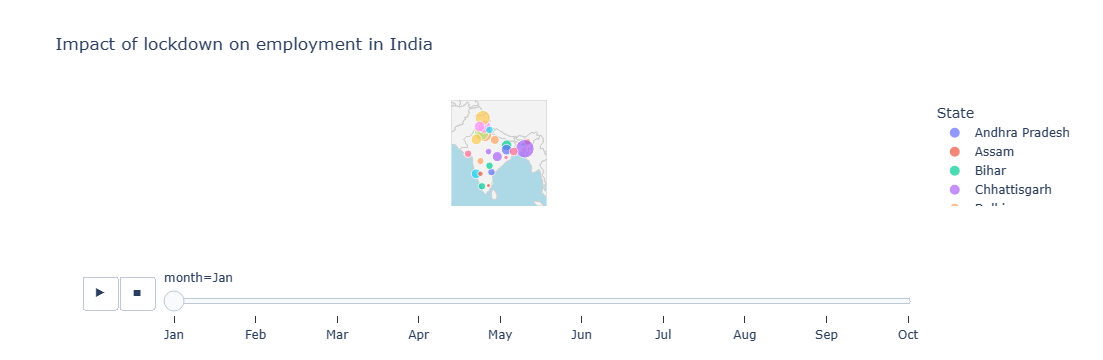

In [38]:
fig=px.scatter_geo(df,'longitude','latitude',color='State',
                  hover_name='State',size='EUR',
                  animation_frame='month',scope='asia',title='Impact of lockdown on employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =2000
fig.update_geos(lataxis_range=[5,40],lonaxis_range=[65,100],oceancolor='lightblue',
               showocean=True,scope='asia',  landcolor='rgb(243, 243, 243)',
               countrycolor='rgb(204, 204, 204)')

fig.show()